### 기울기 소실과 기울기 폭발의 원인

/Users/young/.local/share/virtualenvs/Sung_Kim_ML-2tXuaA7I/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/young/.local/share/virtualenvs/Sung_Kim_ML-2tXuaA7I/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/young/.local/share/virtualenvs/Sung_Kim_ML-2tXuaA7I/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/young/.local/share/virtualenvs/Sung_Kim_ML-2tXuaA7I/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/young/.local/share/virtualenvs/Sung_Kim_ML-2tXuaA7I/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 

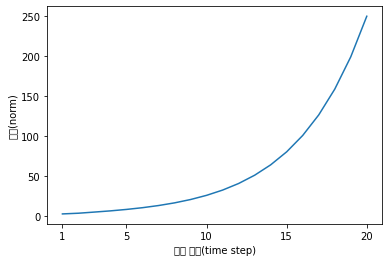

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H)) # (2,3)

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

Wh = np.random.randn(H, H) # (3,3) Wh 값이 크면 기울기 폭발, 작으면 기울기 소실 발생. 그냥 1로 나뒀을 경우 기울기 폭발하는데, 기울기 클리핑을 통해서 보정 가능
# Wh = np.random.randn(H, H) * 0.5 # 기울기 소실
# Wh = np.random.randn(H, H) * 0.7966 # 기울기 constant 인위적으로 0.7966를 구한건데 이렇게 할 수는 없음

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)   # np.dot(h, wh)
                            # (2,3)(3,3) = (2,3)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

# print(norm_list)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show() # 기울기가 점점 커짐

### 기울기 폭발 대책

In [4]:
import numpy as np


dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    print(total_norm)
    rate = max_norm / (total_norm + 1e-6) # max_norm = 5, total_norm = 20 so rate = ~0.25 
    print(rate)
    if rate < 1:
        for grad in grads:
            grad *= rate # 모든 grad에 rate 곱하여 기울기 클리핑 적용하여 기울기 폭발 대책


print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())

before: [6.49144048 2.78487283 6.76254902 5.90862817 0.23981882 5.58854088
 2.59252447 4.15101197 2.83525082]
21.70996045068755
0.2303090224898419
after: [1.49503731 0.64138134 1.55747605 1.36081038 0.05523244 1.28709139
 0.59708178 0.95601551 0.65298384]
